In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Data preparation 
x_seeds = np.array([(0, 0),(1, 0),(0, 1),(1, 1)], dtype = np.float64)
y_seeds = np.array([0, 1, 1, 0]) # XOR

# data를 random하게 준비한다.
N = 1000
idxs = np.random.randint(0,4,N) # 0~3사이의 수 N개 생성 -> index가 된다.

X = x_seeds[idxs]
Y = y_seeds[idxs]

X += np.random.normal(scale = 0.25, size = X.shape)
# print(X)

In [20]:
#  Model
class shallow_neural_network():
    def __init__(self, num_input_features, num_hiddens):
        self.num_input_features = num_input_features
        self.num_hiddens = num_hiddens # hidden layer의 뉴런 수
        
        # random하게 model parameter Initialize
        self.W1 = np.random.normal(size=(num_hiddens, num_input_features))
        self.b1 = np.random.normal(size=num_hiddens)
        self.W2 = np.random.normal(size=num_hiddens)
        self.b2 = np.random.normal(size=1)

    def sigmoid(self,x):
        return 1/(1 + np.exp(-x))
    
    def predict(self, x):
        z1 = np.matmul(self.W1, x) + self.b1
        a1 = np.tanh(z1)
        
        z2 = np.matmul(self.W2, a1) + self.b2
        a2 = self.sigmoid(z2)
        return a2, (z1,a1,z2,a2)
        
# model = shallow_neural_network(2,3)

In [21]:
def train(X, Y, model, lr = 0.1):
    dW1 = np.zeros_like(model.W1)
    db1 = np.zeros_like(model.b1)
    dW2 = np.zeros_like(model.W2)
    db2 = np.zeros_like(model.b2)
    m = len(X)
    cost = 0.0
    for x,y in zip(X,Y):
        a2, (z1,a1, z2, _) = model.predict(x)
        if y == 1:
            cost -= np.log(a2)
        else:
            cost -= np.log(1-a2)
        
        diff = a2-y
        # layer 2
        # db2
        db2 += diff
        
        # dW2
        dW2 += diff * a1 
        
        # layer1
        # db1 
        db1 += (1-a1**2)*model.W2*diff
        #db2
        dW1 += np.outer((1-a1**2)*model.W2,x) * diff
    cost /= m 
    model.W1 -= lr * dW1/m
    model.b1 -= lr * db1/m
    model.W2 -= lr * dW2/m
    model.b2 -= lr * db2/m

    return cost
        

In [22]:
# using for
# def train(X, Y, model, lr = 0.1):
#     dW1 = np.zeros_like(model.W1)
#     db1 = np.zeros_like(model.b1)
#     dW2 = np.zeros_like(model.W2)
#     db2 = np.zeros_like(model.b2)
#     m = len(X)
#     cost = 0.0
#     for x,y in zip(X,Y):
#         a2, (z1,a1, z2, _) = model.predict(x)
#         if y == 1:
#             cost -= np.log(a2)
#         else:
#             cost -= np.log(1-a2)
        
#         diff = a2-y
#         # layer 2
#         # db2
#         db2 += diff
        
#         # dW2
#         for i in range(model.num_hiddens):
#             dW2[i] += a1[i]*diff
        
#         # layer1
#         # db1 
#         for i in range(model.num_hiddens):
#             db1[i] += (1-a1[i]**2)*model.W2[i]*diff
#         #db2
#         for i in range(model.num_hiddens):
#             for j in range(model.num_input_features):
#                 dW1[i,j] += x[j]*(1-a1[i]**2)*model.W2[i]*diff
#     cost /= m 
#     model.W1 -= lr * dW1/m
#     model.b1 -= lr * db1/m
#     model.W2 -= lr * dW2/m
#     model.b2 -= lr * db2/m

#     return cost
        

[0.12440065]
[0.14048312]
[0.12364247]
[0.19545268]


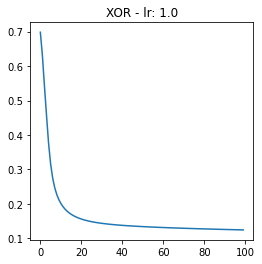

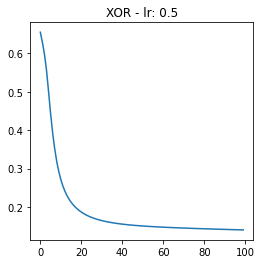

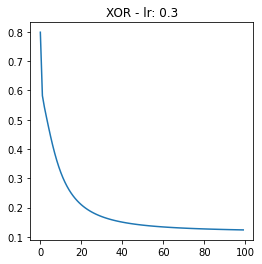

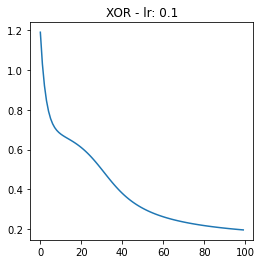

In [24]:
lr_list = [1.0,0.5,0.3,0.1]
n = 1000

for lr in lr_list:
    # print("learning rate : ", lr)
    model = shallow_neural_network(2,3)
    list = []
    for epoch in range(n):
        cost = train(X,Y, model, lr)
        if epoch % 10 ==0:
            list.append(cost)
    plt.figure(figsize=(4,4))
    plt.title("XOR - lr: "+str(lr))
    plt.plot(range(0,int(n/10)),list)
    print(list[-1])
plt.show()

[0.44246003]


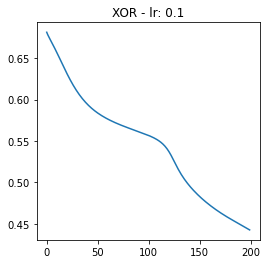

In [ ]:
lr_list = [0.1]
n = 2000

for lr in lr_list:
    # print("learning rate : ", lr)
    model = shallow_neural_network(2,3)
    list = []
    for epoch in range(n):
        cost = train(X,Y, model, lr)
        if epoch % 10 ==0:
            list.append(cost)
    plt.figure(figsize=(4,4))
    plt.title("XOR - lr: "+str(lr))
    plt.plot(range(0,int(n/10)),list)
    print(list[-1])
plt.show()

[0.1188962]
[0.16249001]


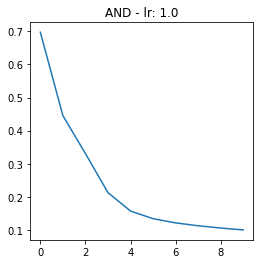

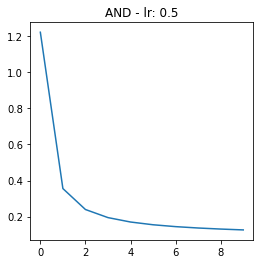

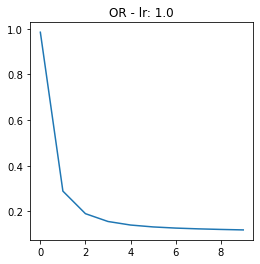

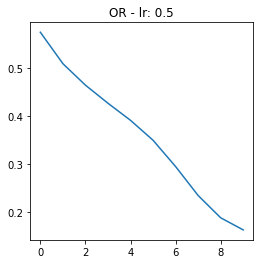

In [ ]:
#  SNN의 AND, OR 학습
and_seeds = np.array([0, 0, 0, 1]) # AND
or_seeds = np.array([0, 1, 1, 1]) # OR

AND = and_seeds[idxs]
OR = or_seeds[idxs]

lr_list = [1.0,0.5]
n = 200
for lr in lr_list:
    # print("learning rate : ", lr)
    model = shallow_neural_network(2,3)
    list = []
    for epoch in range(n):
        cost = train(X,AND, model, lr)
        if epoch % 10 ==0:
            list.append(cost)
    plt.figure(figsize=(4,4))
    plt.title("AND - lr: "+str(lr))
    plt.plot(range(0,int(n/10)),list)

for lr in lr_list:
    # print("learning rate : ", lr)
    model = shallow_neural_network(2,3)
    list = []
    for epoch in range(n):
        cost = train(X,OR, model, lr)
        if epoch % 10 ==0:
            list.append(cost)
    plt.figure(figsize=(4,4))
    plt.title("OR - lr: "+str(lr))
    plt.plot(range(0,int(n/10)),list)
    print(list[-1])
plt.show()